**This notebook requires a test dataset titled 'test.csv' in the same folder with same format as training.csv<br>
It will perform prediction using the model trained in notebook data_exploration_final**


In [1]:
# import packages used

import pandas as pd
import geohash
import GPy 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in test data
df = pd.read_csv('test.csv')

# convert geohash to lat long
df['coordinates'] = df['geohash6'].apply(lambda x:  geohash.decode(x,))

# convert tuple to 2 columns
df['latitutde'] = df['coordinates'].str[0]
df['longtitude'] = df['coordinates'].str[1]

# replace timestamp : with . and change to float type
df['timestamp'] = df['timestamp'].str.replace(':', '.', regex=True)
df['timestamp'] = df['timestamp'].astype(float)

# replace lat long to float type
df['latitutde'] = df['latitutde'].astype(float)
df['longtitude'] = df['longtitude'].astype(float)

In [3]:
# load model trained

test = '30demand'
m = GPy.load(f"output/{test}_model")

In [4]:
df.head()

,geohash6,day,timestamp,demand,coordinates,latitutde,longtitude
0,qp096z,61,14.00,0.917029,"(-5.36, 90.8)",-5.36,90.8
1,qp03wb,61,15.00,0.007262,"(-5.36, 90.7)",-5.36,90.7
2,qp09cg,61,14.15,0.317152,"(-5.3, 90.8)",-5.30,90.8
3,qp09v0,61,14.00,0.626274,"(-5.31, 90.9)",-5.31,90.9
4,qp0d1h,61,14.45,0.114134,"(-5.25, 90.8)",-5.25,90.8


In [5]:
# predict data points

df_test = df
x_pred = df_test.loc[:,['timestamp','latitutde','longtitude']].values.reshape(-1,3)
x_pred
y_pred, sigma = m.predict(x_pred)

In [6]:
# calculate RMSE

ygrid = df_test['demand'].values.reshape(-1,1)
Sqerr = np.power(ygrid - y_pred,2)
MSE = np.sum(Sqerr)
rmse = np.sqrt(MSE/ygrid.size)
print ('RMSE = ' +str(rmse))

RMSE = 0.4752768144150725


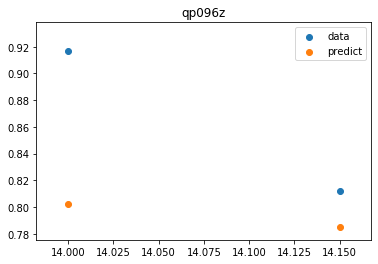

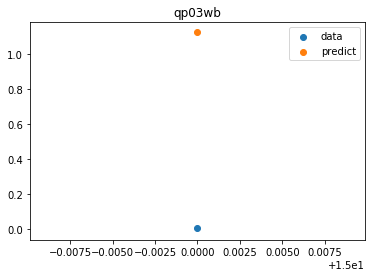

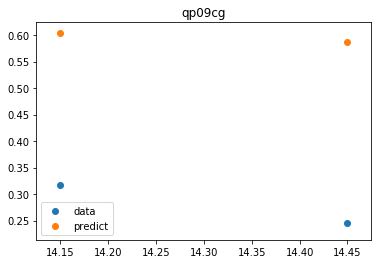

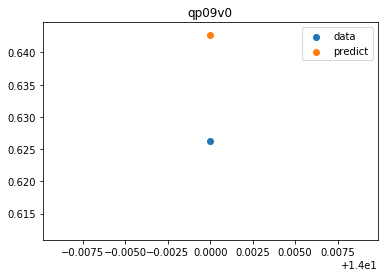

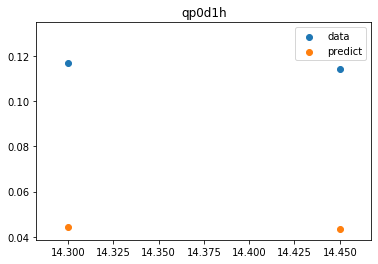

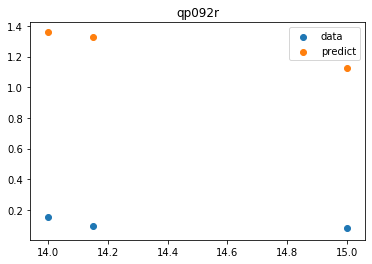

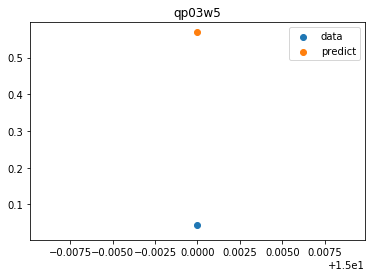

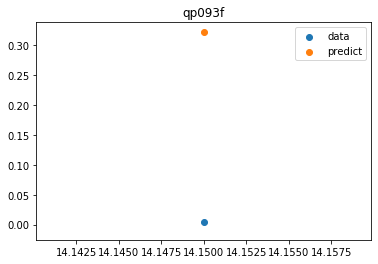

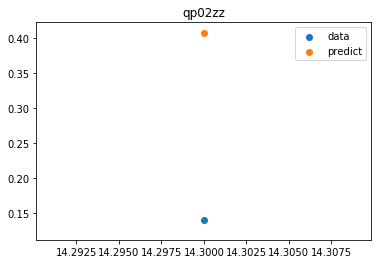

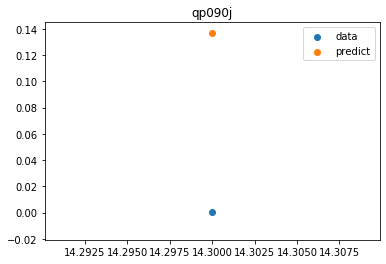

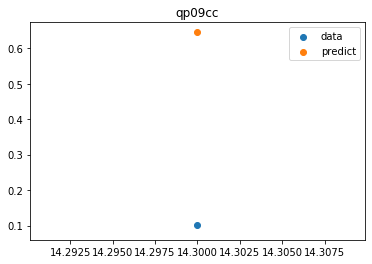

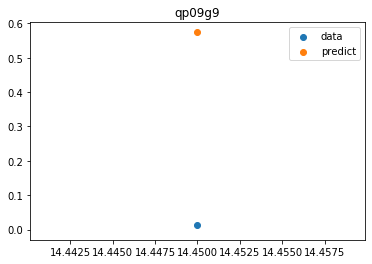

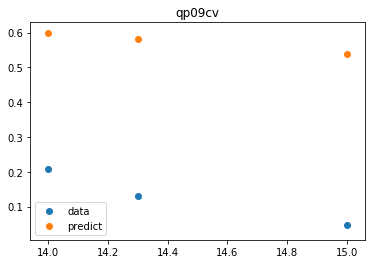

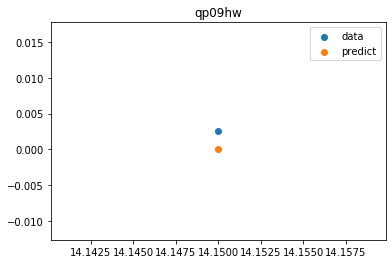

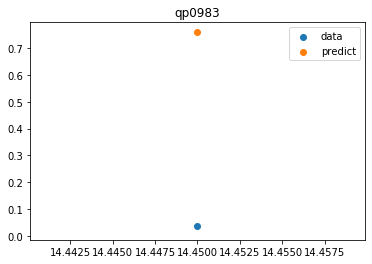

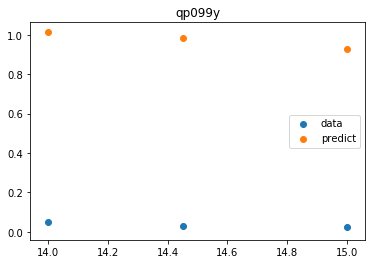

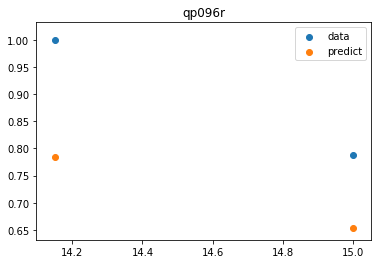

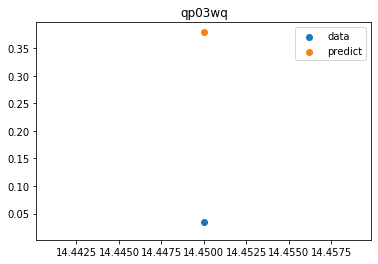

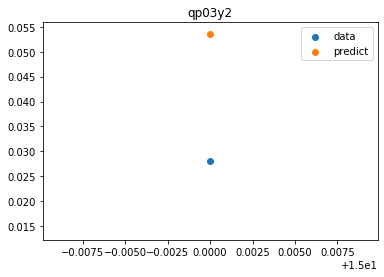

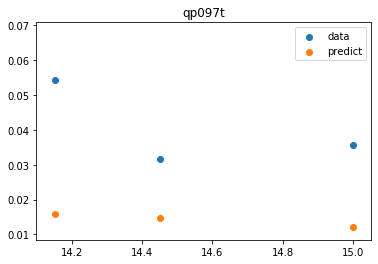

In [7]:
# look at plots for 20 geohash
# not so accurate for these if they are not part of high demand points

lowdemand = df_test['geohash6'].unique()
lowdemand = lowdemand[:20]
for i in lowdemand:
        
    data_x = df_test.loc[df_test['geohash6']==i].index.values
    pred = y_pred[data_x]
    data_y = df_test.loc[df_test['geohash6']==i]['demand']
    x= df_test.loc[df_test['geohash6']==i]['timestamp']
    pred

    plt.scatter(x,data_y,label='data')
    plt.scatter(x,pred,label='predict')
    plt.title(i)
    plt.legend()
    plt.show()